In [ ]:
# Create your first MLP in Keras

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [ ]:
dataset=pd.read_csv('/content/forestfires.csv')

In [ ]:
dataset

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small


In [ ]:
dataset.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,0.143133,0.162476,0.183752,0.117988,0.123791,0.104449,0.017408,0.355899,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,0.350548,0.369244,0.387657,0.322907,0.329662,0.306138,0.130913,0.479249,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
dataset.isna

<bound method DataFrame.isna of     month  day  FFMC    DMC  ...  monthnov  monthoct  monthsep  size_category
0     mar  fri  86.2   26.2  ...         0         0         0          small
1     oct  tue  90.6   35.4  ...         0         1         0          small
2     oct  sat  90.6   43.7  ...         0         1         0          small
3     mar  fri  91.7   33.3  ...         0         0         0          small
4     mar  sun  89.3   51.3  ...         0         0         0          small
..    ...  ...   ...    ...  ...       ...       ...       ...            ...
512   aug  sun  81.6   56.7  ...         0         0         0          large
513   aug  sun  81.6   56.7  ...         0         0         0          large
514   aug  sun  81.6   56.7  ...         0         0         0          large
515   aug  sat  94.4  146.0  ...         0         0         0          small
516   nov  tue  79.5    3.0  ...         1         0         0          small

[517 rows x 31 columns]>

In [ ]:
#Dummy variables are already created, so we will remove the month and alsoday columns
dataset.drop(["month","day"],axis=1,inplace = True)

In [ ]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [ ]:
# split into input (X) and output (Y) variables
X = dataset.iloc[:,0:28]
Y = dataset.iloc[:,28]

In [ ]:
a = StandardScaler()
a.fit(X)
X_standardized = a.transform(X)

In [ ]:
pd.DataFrame(X_standardized).describe

<bound method NDFrame.describe of            0         1         2   ...         25        26        27
0   -0.805959 -1.323326 -1.830477  ...  -0.044023 -0.172860 -0.706081
1   -0.008102 -1.179541  0.488891  ...  -0.044023  5.785038 -0.706081
2   -0.008102 -1.049822  0.560715  ...  -0.044023  5.785038 -0.706081
3    0.191362 -1.212361 -1.898266  ...  -0.044023 -0.172860 -0.706081
4   -0.243833 -0.931043 -1.798600  ...  -0.044023 -0.172860 -0.706081
..        ...       ...       ...  ...        ...       ...       ...
512 -1.640083 -0.846648  0.474768  ...  -0.044023 -0.172860 -0.706081
513 -1.640083 -0.846648  0.474768  ...  -0.044023 -0.172860 -0.706081
514 -1.640083 -0.846648  0.474768  ...  -0.044023 -0.172860 -0.706081
515  0.680957  0.549003  0.269382  ...  -0.044023 -0.172860 -0.706081
516 -2.020879 -1.685913 -1.780442  ...  22.715633 -0.172860 -0.706081

[517 rows x 28 columns]>

In [ ]:
!pip install tensorflow

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import GridSearchCV , KFold
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam
#import tensorflow as tf
#optim = tf.keras.optimizers.Adam()

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder_x=LabelEncoder()
X=X.apply(LabelEncoder().fit_transform)
X

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,28,37,41,29,12,34,14,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,56,49,144,42,85,16,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,56,56,156,42,55,16,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,67,48,33,64,13,72,8,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,46,66,46,68,30,73,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,9,71,141,7,172,15,5,0,123,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
513,9,71,141,7,123,54,12,0,228,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
514,9,71,141,7,116,53,14,0,167,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
515,92,168,122,80,156,25,8,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
Y

0      small
1      small
2      small
3      small
4      small
       ...  
512    large
513    large
514    large
515    small
516    small
Name: size_category, Length: 517, dtype: object

In [ ]:
Y = pd.DataFrame(Y)
label_encoder_y = LabelEncoder()
Y = Y.apply(LabelEncoder().fit_transform)
Y

,size_category
0,1
1,1
2,1
3,1
4,1
...,...
512,0
513,0
514,0
515,1


In [ ]:
X_norm = norm_func(X)

In [ ]:
# create model
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=28, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(10, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

    adam= Adam(lr=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [ ]:
model = KerasClassifier(build_fn= create_model, verbose=0)
batch_size = [10, 20, 40]
epochs = [10, 50, 100]
param_grid = dict(batch_size = batch_size, epochs = epochs)
grid = GridSearchCV(estimator = model, param_grid= param_grid, cv = KFold(), verbose = 10)
grid_result = grid.fit(X_standardized, Y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  """Entry point for launching an IPython kernel.


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 1/9] END .....batch_size=10, epochs=10;, score=0.971 total time=   5.6s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 1/9] END .....batch_size=10, epochs=10;, score=0.856 total time=   3.2s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 1/9] END .....batch_size=10, epochs=10;, score=0.854 total time=   1.3s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 1/9] END .....batch_size=10, epochs=10;, score=0.845 total time=   1.3s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 1/9] END .....batch_size=10, epochs=10;, score=0.874 total time=   1.4s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 2/9] END .....batch_size=10, epochs=50;, score=1.000 total time=   3.1s
[CV 2/5; 2/9] START batch_size=10, epochs=50....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 2/9] END .....batch_size=10, epochs=50;, score=0.875 total time=   3.2s
[CV 3/5; 2/9] START batch_size=10, epochs=50....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 2/9] END .....batch_size=10, epochs=50;, score=0.825 total time=   3.3s
[CV 4/5; 2/9] START batch_size=10, epochs=50....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 2/9] END .....batch_size=10, epochs=50;, score=0.922 total time=   3.2s
[CV 5/5; 2/9] START batch_size=10, epochs=50....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 2/9] END .....batch_size=10, epochs=50;, score=0.922 total time=   3.2s
[CV 1/5; 3/9] START batch_size=10, epochs=100...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 3/9] END ....batch_size=10, epochs=100;, score=1.000 total time=   5.3s
[CV 2/5; 3/9] START batch_size=10, epochs=100...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 3/9] END ....batch_size=10, epochs=100;, score=0.856 total time=   5.4s
[CV 3/5; 3/9] START batch_size=10, epochs=100...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 3/9] END ....batch_size=10, epochs=100;, score=0.893 total time=   5.4s
[CV 4/5; 3/9] START batch_size=10, epochs=100...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 3/9] END ....batch_size=10, epochs=100;, score=0.913 total time=   5.8s
[CV 5/5; 3/9] START batch_size=10, epochs=100...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 3/9] END ....batch_size=10, epochs=100;, score=0.913 total time=   5.7s
[CV 1/5; 4/9] START batch_size=20, epochs=10....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 4/9] END .....batch_size=20, epochs=10;, score=1.000 total time=   0.9s
[CV 2/5; 4/9] START batch_size=20, epochs=10....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 4/9] END .....batch_size=20, epochs=10;, score=0.808 total time=   1.0s
[CV 3/5; 4/9] START batch_size=20, epochs=10....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 4/9] END .....batch_size=20, epochs=10;, score=0.738 total time=   1.0s
[CV 4/5; 4/9] START batch_size=20, epochs=10....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 4/9] END .....batch_size=20, epochs=10;, score=0.825 total time=   1.0s
[CV 5/5; 4/9] START batch_size=20, epochs=10....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 4/9] END .....batch_size=20, epochs=10;, score=0.864 total time=   1.0s
[CV 1/5; 5/9] START batch_size=20, epochs=50....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 5/9] END .....batch_size=20, epochs=50;, score=1.000 total time=   2.6s
[CV 2/5; 5/9] START batch_size=20, epochs=50....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 5/9] END .....batch_size=20, epochs=50;, score=0.837 total time=   1.9s
[CV 3/5; 5/9] START batch_size=20, epochs=50....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 5/9] END .....batch_size=20, epochs=50;, score=0.893 total time=   1.9s
[CV 4/5; 5/9] START batch_size=20, epochs=50....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 5/9] END .....batch_size=20, epochs=50;, score=0.903 total time=   1.9s
[CV 5/5; 5/9] START batch_size=20, epochs=50....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 5/9] END .....batch_size=20, epochs=50;, score=0.893 total time=   2.3s
[CV 1/5; 6/9] START batch_size=20, epochs=100...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 6/9] END ....batch_size=20, epochs=100;, score=1.000 total time=   3.1s
[CV 2/5; 6/9] START batch_size=20, epochs=100...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 6/9] END ....batch_size=20, epochs=100;, score=0.865 total time=   3.1s
[CV 3/5; 6/9] START batch_size=20, epochs=100...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 6/9] END ....batch_size=20, epochs=100;, score=0.903 total time=   3.2s
[CV 4/5; 6/9] START batch_size=20, epochs=100...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 6/9] END ....batch_size=20, epochs=100;, score=0.903 total time=   3.3s
[CV 5/5; 6/9] START batch_size=20, epochs=100...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 6/9] END ....batch_size=20, epochs=100;, score=0.893 total time=   3.1s
[CV 1/5; 7/9] START batch_size=40, epochs=10....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 7/9] END .....batch_size=40, epochs=10;, score=1.000 total time=   0.8s
[CV 2/5; 7/9] START batch_size=40, epochs=10....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 7/9] END .....batch_size=40, epochs=10;, score=0.750 total time=   0.8s
[CV 3/5; 7/9] START batch_size=40, epochs=10....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 7/9] END .....batch_size=40, epochs=10;, score=0.699 total time=   0.8s
[CV 4/5; 7/9] START batch_size=40, epochs=10....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 7/9] END .....batch_size=40, epochs=10;, score=0.718 total time=   0.8s
[CV 5/5; 7/9] START batch_size=40, epochs=10....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 7/9] END .....batch_size=40, epochs=10;, score=0.835 total time=   1.2s
[CV 1/5; 8/9] START batch_size=40, epochs=50....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 8/9] END .....batch_size=40, epochs=50;, score=0.990 total time=   2.0s
[CV 2/5; 8/9] START batch_size=40, epochs=50....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 8/9] END .....batch_size=40, epochs=50;, score=0.875 total time=   1.9s
[CV 3/5; 8/9] START batch_size=40, epochs=50....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 8/9] END .....batch_size=40, epochs=50;, score=0.883 total time=   1.4s
[CV 4/5; 8/9] START batch_size=40, epochs=50....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 8/9] END .....batch_size=40, epochs=50;, score=0.903 total time=   1.9s
[CV 5/5; 8/9] START batch_size=40, epochs=50....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 8/9] END .....batch_size=40, epochs=50;, score=0.893 total time=   1.4s
[CV 1/5; 9/9] START batch_size=40, epochs=100...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 9/9] END ....batch_size=40, epochs=100;, score=1.000 total time=   2.1s
[CV 2/5; 9/9] START batch_size=40, epochs=100...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 9/9] END ....batch_size=40, epochs=100;, score=0.856 total time=   2.0s
[CV 3/5; 9/9] START batch_size=40, epochs=100...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 9/9] END ....batch_size=40, epochs=100;, score=0.883 total time=   2.0s
[CV 4/5; 9/9] START batch_size=40, epochs=100...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 9/9] END ....batch_size=40, epochs=100;, score=0.903 total time=   3.2s
[CV 5/5; 9/9] START batch_size=40, epochs=100...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 9/9] END ....batch_size=40, epochs=100;, score=0.883 total time=   2.0s


In [ ]:
print('Best: {}, Using {}'.format(grid_result.best_score_, grid_result.best_params_))
means=grid_result.cv_results_['mean_test_score']
stds=grid_result.cv_results_['std_test_score']
params=grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print ('{},{} with {}'.format(mean, stdev, params))

Best: 0.9148431658744812, Using {'batch_size': 10, 'epochs': 100}
0.8799477219581604,0.046563082679960455 with [{'batch_size': 10, 'epochs': 10}, {'batch_size': 10, 'epochs': 50}, {'batch_size': 10, 'epochs': 100}, {'batch_size': 20, 'epochs': 10}, {'batch_size': 20, 'epochs': 50}, {'batch_size': 20, 'epochs': 100}, {'batch_size': 40, 'epochs': 10}, {'batch_size': 40, 'epochs': 50}, {'batch_size': 40, 'epochs': 100}]
0.9089805722236634,0.057978730345665544 with [{'batch_size': 10, 'epochs': 10}, {'batch_size': 10, 'epochs': 50}, {'batch_size': 10, 'epochs': 100}, {'batch_size': 20, 'epochs': 10}, {'batch_size': 20, 'epochs': 50}, {'batch_size': 20, 'epochs': 100}, {'batch_size': 40, 'epochs': 10}, {'batch_size': 40, 'epochs': 50}, {'batch_size': 40, 'epochs': 100}]
0.9148431658744812,0.04736992780462155 with [{'batch_size': 10, 'epochs': 10}, {'batch_size': 10, 'epochs': 50}, {'batch_size': 10, 'epochs': 100}, {'batch_size': 20, 'epochs': 10}, {'batch_size': 20, 'epochs': 50}, {'batch_

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(X_norm,Y, test_size=0.2)

In [ ]:
final_model=create_model()

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# Fit the model
final_model.fit(x_train, y_train, epochs=100, batch_size=10)

Epoch 1/100
28/28 [==============================] - 0s 8ms/step - loss: 0.0181 - accuracy: 0.9928 - val_loss: 0.0942 - val_accuracy: 0.9562
Epoch 2/100
28/28 [==============================] - 0s 6ms/step - loss: 0.0384 - accuracy: 0.9855 - val_loss: 0.1126 - val_accuracy: 0.9635
Epoch 3/100
28/28 [==============================] - 0s 5ms/step - loss: 0.0255 - accuracy: 0.9928 - val_loss: 0.3122 - val_accuracy: 0.9270
Epoch 4/100
28/28 [==============================] - 0s 4ms/step - loss: 0.0621 - accuracy: 0.9746 - val_loss: 0.3550 - val_accuracy: 0.9197
Epoch 5/100
28/28 [==============================] - 0s 3ms/step - loss: 0.0153 - accuracy: 0.9928 - val_loss: 0.1230 - val_accuracy: 0.9489
Epoch 6/100
28/28 [==============================] - 0s 3ms/step - loss: 0.0533 - accuracy: 0.9746 - val_loss: 0.0918 - val_accuracy: 0.9635
Epoch 7/100
28/28 [==============================] - 0s 3ms/step - loss: 0.0518 - accuracy: 0.9783 - val_loss: 0.2504 - val_accuracy: 0.9416
Epoch 8/100
2

In [ ]:
# evaluate the model
loss, accuracy = final_model.evaluate(x_train, y_train, verbose=0)
print('Accuracy: %f' % (accuracy))
print('Loss: %f' % (loss))

Accuracy: 0.980630
Loss: 0.058044


In [ ]:
loss, accuracy = final_model.evaluate(x_test, y_test, verbose=0)
print('Accuracy: %f' % (accuracy))
print('Loss: %f' % (loss))

Accuracy: 0.932692
Loss: 0.373422


In [ ]:
history = final_model.fit(x_train, y_train,
   batch_size = 128, epochs = 10,
   verbose = 2, validation_data = (x_test, y_test))

Epoch 1/10
4/4 - 0s - loss: 0.0650 - accuracy: 0.9806 - val_loss: 0.2473 - val_accuracy: 0.9615 - 189ms/epoch - 47ms/step
Epoch 2/10
4/4 - 0s - loss: 0.0389 - accuracy: 0.9855 - val_loss: 0.2342 - val_accuracy: 0.9519 - 55ms/epoch - 14ms/step
Epoch 3/10
4/4 - 0s - loss: 0.0270 - accuracy: 0.9855 - val_loss: 0.1295 - val_accuracy: 0.9519 - 47ms/epoch - 12ms/step
Epoch 4/10
4/4 - 0s - loss: 0.0122 - accuracy: 0.9927 - val_loss: 0.0702 - val_accuracy: 0.9808 - 48ms/epoch - 12ms/step
Epoch 5/10
4/4 - 0s - loss: 0.0129 - accuracy: 0.9927 - val_loss: 0.0963 - val_accuracy: 0.9712 - 47ms/epoch - 12ms/step
Epoch 6/10
4/4 - 0s - loss: 0.0125 - accuracy: 0.9976 - val_loss: 0.1157 - val_accuracy: 0.9615 - 51ms/epoch - 13ms/step
Epoch 7/10
4/4 - 0s - loss: 0.0077 - accuracy: 0.9976 - val_loss: 0.0975 - val_accuracy: 0.9808 - 63ms/epoch - 16ms/step
Epoch 8/10
4/4 - 0s - loss: 0.0068 - accuracy: 0.9976 - val_loss: 0.1071 - val_accuracy: 0.9615 - 51ms/epoch - 13ms/step
Epoch 9/10
4/4 - 0s - loss: 0.0

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


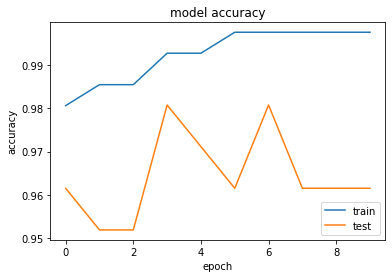

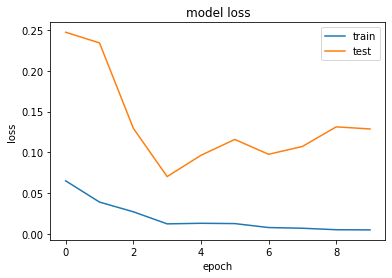

In [ ]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()